## 1. Importing Packages

In [182]:
%matplotlib inline

import re
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

plt.style.use('ggplot')
figsize(15,8)
pd.set_option('display.max_columns', None)


## 2. Importing Data

In [183]:
path = "data/RVDS_technical_assessment/"

In [184]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [185]:
print train.shape
print test.shape

(24001, 25)
(5999, 24)


In [186]:
train.head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
0,1,1500,2,1,2,23,0,0,0,2,2,0,1452,1503,1482,1463,938,698,75,150,86,0,50,50,yes
1,2,8500,2,2,2,29,0,0,0,0,0,0,8079,8175,8300,8364,8275,8425,300,400,315,300,325,305,no
2,3,1000,1,1,2,22,0,0,0,0,0,0,733,831,896,933,772,794,150,150,150,24,105,110,no
3,4,10500,1,1,1,31,0,0,0,0,0,0,7049,7011,7077,7190,7229,7340,255,260,258,260,265,307,no
4,5,10500,2,2,1,44,0,0,0,0,0,0,4487,4501,3533,3558,3592,3496,180,155,145,130,135,200,no


In [187]:
test.head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,24002,10500,1,2,2,34,0,0,0,0,-1,-1,1235,1077,2080,1741,881,120,99,1053,724,884,120,24
1,24003,27500,2,5,2,52,-2,-2,-2,-2,-2,-2,13868,13326,12816,987,23,409,300,300,987,23,409,0
2,24004,27500,2,2,1,32,2,0,0,0,0,0,27427,27337,26775,27401,26533,7754,1054,1143,8381,700,215,7903
3,24005,9000,2,2,1,32,1,2,2,2,0,0,777,750,887,858,936,1169,0,150,0,100,250,100
4,24006,500,1,3,2,42,1,2,2,2,0,0,404,316,431,294,220,259,0,129,0,50,50,17


## 3. Exploratory Data Analysis

### 3.1 Checking missing values

In [188]:
train.isnull().sum()

customer_id       0
limit_bal         0
sex               0
education         0
marriage          0
age               0
pay_1             0
pay_2             0
pay_3             0
pay_4             0
pay_5           182
pay_6          1211
bill_amt1         0
bill_amt2         0
bill_amt3         0
bill_amt4         0
bill_amt5       182
bill_amt6      1211
pay_amt1          0
pay_amt2          0
pay_amt3          0
pay_amt4          0
pay_amt5        182
pay_amt6       1211
default_oct       0
dtype: int64

In [189]:
test.isnull().sum()

customer_id      0
limit_bal        0
sex              0
education        0
marriage         0
age              0
pay_1            0
pay_2            0
pay_3            0
pay_4            0
pay_5           44
pay_6          290
bill_amt1        0
bill_amt2        0
bill_amt3        0
bill_amt4        0
bill_amt5       44
bill_amt6      290
pay_amt1         0
pay_amt2         0
pay_amt3         0
pay_amt4         0
pay_amt5        44
pay_amt6       290
dtype: int64

In [190]:
train[train['pay_5'].isnull()].head()

,customer_id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_oct
10,11,4500,2,2,2,33,2,2,0,0,NaN,NaN,3068,2990,3090,3259,NaN,NaN,0,150,250,0,NaN,NaN,yes
101,102,1000,2,3,2,22,0,0,0,0,NaN,NaN,710,678,706,686,NaN,NaN,85,75,0,0,NaN,NaN,no
177,178,14000,2,1,1,36,-1,2,-1,-1,NaN,NaN,41,20,20,20,NaN,NaN,0,20,20,2960,NaN,NaN,no
205,206,7000,2,2,1,24,-1,-1,-1,-1,NaN,NaN,34,34,34,34,NaN,NaN,34,34,34,34,NaN,NaN,no
263,264,3000,2,2,1,36,-1,2,2,2,NaN,NaN,78,124,165,180,NaN,NaN,55,50,25,0,NaN,NaN,no


### 3.2 Checking and converting column data types

In [191]:
train.dtypes

customer_id      int64
limit_bal        int64
sex            float64
education      float64
marriage       float64
age            float64
pay_1          float64
pay_2          float64
pay_3          float64
pay_4          float64
pay_5          float64
pay_6          float64
bill_amt1        int64
bill_amt2        int64
bill_amt3        int64
bill_amt4        int64
bill_amt5      float64
bill_amt6      float64
pay_amt1         int64
pay_amt2         int64
pay_amt3         int64
pay_amt4         int64
pay_amt5       float64
pay_amt6       float64
default_oct     object
dtype: object

In [192]:
convert_cols_obj = ['sex',
                    'education',
                    'marriage',
                    'pay_1',
                    'pay_2',
                    'pay_3',
                    'pay_4',
                    'pay_5',
                    'pay_6']

train[convert_cols_obj] = train[convert_cols_obj].astype('object')
test[convert_cols_obj] = test[convert_cols_obj].astype('object')

### 3.3 Column summary statistics

In [193]:
train.describe()

,customer_id,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000,24001.000000,24001.000000,24001.000000,24001.000000,23819.000000,22790.000000
mean,12001.000000,8351.302029,35.498438,2574.245865,2467.107037,2359.795592,2175.804383,2024.383559,1960.335981,281.079955,298.237073,263.109704,243.367943,238.731139,256.517069
std,6928.636241,6475.592450,9.222021,3706.812804,3585.952168,3499.639871,3244.170936,3063.487512,3015.469078,846.819525,1215.481369,899.406651,782.138847,779.341974,861.106314
min,1.000000,500.000000,21.000000,-8279.000000,-3488.000000,-3075.000000,-8500.000000,-4066.000000,-10452.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6001.000000,2500.000000,28.000000,177.000000,147.000000,130.000000,116.000000,90.000000,62.000000,49.000000,41.000000,19.000000,15.000000,12.000000,6.000000
50%,12001.000000,7000.000000,34.000000,1123.000000,1059.000000,1007.000000,953.000000,906.000000,855.500000,105.000000,100.000000,90.000000,75.000000,75.000000,75.000000
75%,18001.000000,12000.000000,41.000000,3375.000000,3202.000000,3015.000000,2752.000000,2510.500000,2466.000000,250.000000,250.000000,227.000000,200.000000,200.000000,200.000000
max,24001.000000,50000.000000,79.000000,48225.000000,49196.000000,83204.000000,44579.000000,46358.000000,48083.000000,43677.000000,84212.000000,44802.000000,31050.000000,21326.000000,26433.000000


In [194]:
test.describe()

,customer_id,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5955.000000,5709.000000,5999.000000,5999.000000,5999.000000,5999.000000,5955.000000,5709.000000
mean,27001.000000,8465.891649,35.433739,2506.752292,2424.308218,2312.106184,2110.538923,1971.674559,1904.727973,290.436906,286.199700,252.901984,232.027005,242.401175,284.189525
std,1731.906464,6534.081379,9.201999,3579.547514,3447.314755,3335.419806,3103.495178,2950.030089,2865.255691,748.761295,852.091851,799.425171,787.833885,698.798315,1031.312882
min,24002.000000,500.000000,21.000000,-490.000000,-1500.000000,-7863.000000,-1374.000000,-1807.000000,-16980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25501.500000,2500.000000,28.000000,179.000000,156.000000,139.000000,116.000000,76.000000,63.000000,50.000000,41.500000,20.000000,11.000000,10.500000,3.000000
50%,27001.000000,7000.000000,34.000000,1097.000000,1065.000000,991.000000,949.000000,894.000000,835.000000,106.000000,100.000000,90.000000,75.000000,77.000000,75.000000
75%,28500.500000,12000.000000,41.000000,3282.000000,3185.500000,2971.000000,2601.000000,2489.000000,2455.000000,255.500000,250.000000,220.000000,200.000000,209.000000,200.000000
max,30000.000000,40000.000000,75.000000,31087.000000,28478.000000,28897.000000,30841.000000,27394.000000,24955.000000,15240.000000,16273.000000,20879.000000,26444.000000,16549.000000,26357.000000


In [195]:
train.describe(include = ['O'])

,sex,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default_oct
count,24001,24001,24001,24001,24001,24001,24001,23819,22790,24001
unique,2,7,4,11,11,11,11,10,10,2
top,2,2,2,0,0,0,0,0,0,no
freq,14498,11248,12746,11793,12591,12610,13137,13461,12388,18692


In [196]:
test.describe(include = ['O'])

,sex,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
count,5999,5999,5999,5999,5999,5999,5999,5955,5709
unique,2,7,4,10,10,9,9,8,10
top,2,2,2,0,0,0,0,0,0
freq,3614,2782,3218,2944,3139,3154,3318,3356,3077


Education and marriage have different more levels than mentioned in the README. Since the levels match in the training and testing set, I am leaving them as it is else I would have grouped the extraneous levels into the 'other' category.

## 4. Data Cleaning

### 4.1 Removing Columns

In [197]:
remove_cols = ['customer_id',
               'pay_1',
               'pay_2',
               'pay_3',
               'pay_4',
               'pay_5',
               'pay_6']

Removing the pay_1,pay_2,.....pay_6 columns since their values don't make sense in many cases.

In [198]:
train_m = train.drop(remove_cols,axis = 1)
test_m = test.drop(remove_cols,axis = 1)

## 5. Feature Engineering

### 5.1 Difference in bill_amt & pay_amt

In [200]:
for i in range(1,7):
    train_m['diff_amt%s' % i] = train_m['bill_amt%s' % i] - train_m['pay_amt%s' %i]
    test_m['diff_amt%s' % i] = test_m['bill_amt%s' % i] - test_m['pay_amt%s' %i]

### 5.2 Summarizing bill_amt, pay_amt and diff_amt as a proportion of limit_bal 

In [201]:
def summarize_features(df,cols,name):
    df['%s_mean' % name] = df[cols].mean(axis = 1)/df['limit_bal']
    df['%s_std' % name] = df[cols].std(axis = 1)/df['limit_bal']
    df['%s_max' % name] = df[cols].max(axis = 1)/df['limit_bal']
    df['%s_min' % name] = df[cols].min(axis = 1) /df['limit_bal']
    df['%s_25' % name] = df[cols].quantile(q = 0.25, axis = 1)/df['limit_bal']
    df['%s_50' % name] = df[cols].quantile(q = 0.50, axis = 1)/df['limit_bal']
    df['%s_75' % name] = df[cols].quantile(q = 0.75, axis = 1)/df['limit_bal']
    return df

In [202]:
cols = filter(lambda x : "%s_" % "bill" in x, train_m.columns.values)
train_m = summarize_features(train_m,cols,"bill")
test_m = summarize_features(test_m,cols,"bill")

In [203]:
cols = filter(lambda x : "%s_" % "pay" in x, train_m.columns.values)
train_m = summarize_features(train_m,cols,"pay")
test_m = summarize_features(test_m,cols,"pay")

In [204]:
cols = filter(lambda x : "%s_" % "diff" in x, train_m.columns.values)
train_m = summarize_features(train_m,cols,"diff")
test_m = summarize_features(test_m,cols,"diff")

### 5.3 Removing actual bill_amt, pay_amt and diff_amt

In [205]:
remove_cols = ['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6',
               'pay_amt1','pay_amt2','pay_amt3','pay_amt4','pay_amt5','pay_amt6',
               'diff_amt1','diff_amt2','diff_amt3','diff_amt4','diff_amt5','diff_amt6']

In [230]:
train_mm = train_m.drop(remove_cols,axis = 1)
test_mm = test_m.drop(remove_cols,axis = 1)

In [231]:
train_mm.head()

,limit_bal,sex,education,marriage,age,default_oct,bill_mean,bill_std,bill_max,bill_min,bill_25,bill_50,bill_75,pay_mean,pay_std,pay_max,pay_min,pay_25,pay_50,pay_75,diff_mean,diff_std,diff_max,diff_min,diff_25,diff_50,diff_75
0,1500,2,1,2,23,yes,0.837333,0.232061,1.002000,0.465333,0.711000,0.971667,0.984833,0.045667,0.033156,0.100000,0.000000,0.033333,0.041667,0.055500,0.791667,0.223792,0.975333,0.432000,0.669500,0.910000,0.927500
1,8500,2,2,2,29,no,0.972902,0.014815,0.991176,0.950471,0.964706,0.975000,0.982118,0.038137,0.004517,0.047059,0.035294,0.035441,0.036471,0.037941,0.934765,0.016875,0.955294,0.914706,0.920206,0.937353,0.946382
2,1000,1,1,2,22,no,0.826500,0.076107,0.933000,0.733000,0.777500,0.812500,0.879750,0.114833,0.049155,0.150000,0.024000,0.106250,0.130000,0.150000,0.711667,0.109887,0.909000,0.583000,0.670500,0.682500,0.730500
3,10500,1,1,1,31,no,0.680889,0.011955,0.699048,0.667714,0.672000,0.679381,0.687548,0.025476,0.001869,0.029238,0.024286,0.024619,0.024762,0.025119,0.655413,0.010494,0.669810,0.642952,0.647643,0.654714,0.662429
4,10500,2,2,1,44,no,0.367730,0.046782,0.428667,0.332952,0.337071,0.340476,0.406024,0.015000,0.002604,0.019048,0.012381,0.013095,0.014286,0.016548,0.352730,0.046252,0.413905,0.313905,0.323619,0.327857,0.389952


In [232]:
test_mm.head()

,limit_bal,sex,education,marriage,age,bill_mean,bill_std,bill_max,bill_min,bill_25,bill_50,bill_75,pay_mean,pay_std,pay_max,pay_min,pay_25,pay_50,pay_75,diff_mean,diff_std,diff_max,diff_min,diff_25,diff_50,diff_75
0,10500,1,2,2,34,0.113238,0.065304,0.198095,0.011429,0.088571,0.110095,0.153762,0.046095,0.043303,0.100286,0.002286,0.009929,0.040190,0.080381,0.067143,0.051648,0.129143,0.002286,0.024976,0.077048,0.101548
1,27500,2,5,2,52,0.251085,0.256736,0.504291,0.000836,0.020127,0.250964,0.479945,0.012236,0.013036,0.035891,0.000000,0.003355,0.010909,0.013882,0.238848,0.249869,0.493382,-0.014036,0.019918,0.232600,0.462791
2,27500,2,2,1,32,0.868042,0.287432,0.997345,0.281964,0.967036,0.983855,0.995818,0.117552,0.138899,0.304764,0.007818,0.028673,0.039945,0.225927,0.750491,0.388229,0.970945,-0.005418,0.739782,0.954764,0.958518
3,9000,2,2,1,32,0.099574,0.016713,0.129889,0.083333,0.088583,0.096944,0.102639,0.011111,0.010541,0.027778,0.000000,0.002778,0.011111,0.015278,0.088463,0.018266,0.118778,0.066667,0.078222,0.085278,0.095500
4,500,1,3,2,42,0.641333,0.164408,0.862000,0.440000,0.535500,0.610000,0.764000,0.082000,0.097341,0.258000,0.000000,0.008500,0.067000,0.100000,0.559333,0.222109,0.862000,0.340000,0.401500,0.486000,0.728000


## 5. Modeling 

### 5.1 Pre-processing data for modeling

In [233]:
from sklearn.preprocessing import LabelEncoder
target = 'default_oct'
continous_feat = [col for col in train_mm.columns.values if train_mm[col].dtype == 'int64' or  train_mm[col].dtype == 'float64']
categorical_feat = [col for col in train_mm.columns.values if train_mm[col].dtype == "object" and col != target]

flf = LabelEncoder()
train_mm[target] = flf.fit_transform(train_mm[target])

In [234]:
train_mm[target].value_counts()

0    18692
1     5309
Name: default_oct, dtype: int64

In [236]:
X_train = pd.concat([pd.get_dummies(train_mm[categorical_feat]), train_mm[continous_feat]], axis = 1)
X_test = pd.concat([pd.get_dummies(test_mm[categorical_feat]), test_mm[continous_feat]], axis = 1)
y_train = train_mm[target]

### 5.2 Baseline Random Forest

In [237]:
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.grid_search import GridSearchCV

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
clf = RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced')

In [241]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Cross-validated log loss

In [242]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(clf, X_train, y_train, scoring = 'neg_log_loss', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

-0.480992140421 0.0034483077852


Cross-validated AUC

In [251]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(clf, X_train, y_train, scoring = 'roc_auc', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

0.707752173754 0.00512926815687


### 5.3 Tuned Random Forest

In [265]:
glf = GridSearchCV(RandomForestClassifier(n_estimators = 1000, class_weight = 'balanced'),
                   param_grid = {'max_features': range(4,11)},
                   scoring = 'neg_log_loss',
                   n_jobs = -1,
                   verbose = 1)
glf.fit(X_train,y_train)  

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 10.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='neg_log_loss',
       verbose=1)

In [268]:
print glf.best_params_, glf.best_score_

{'max_features': 4} -0.48144788314


In [269]:
glf.grid_scores_

[mean: -0.48145, std: 0.00019, params: {'max_features': 4},
 mean: -0.48233, std: 0.00015, params: {'max_features': 5},
 mean: -0.48351, std: 0.00168, params: {'max_features': 6},
 mean: -0.48270, std: 0.00018, params: {'max_features': 7},
 mean: -0.48240, std: 0.00055, params: {'max_features': 8},
 mean: -0.48273, std: 0.00040, params: {'max_features': 9},
 mean: -0.48368, std: 0.00182, params: {'max_features': 10}]

In [270]:
clf_tuned = glf.best_estimator_

Cross-validated log loss

In [271]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(clf_tuned, X_train, y_train, scoring = 'neg_log_loss', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

-0.480924060929 0.00461808926172


Cross-validated AUC

In [272]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(clf_tuned, X_train, y_train, scoring = 'roc_auc', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

0.708504286854 0.00553629952048


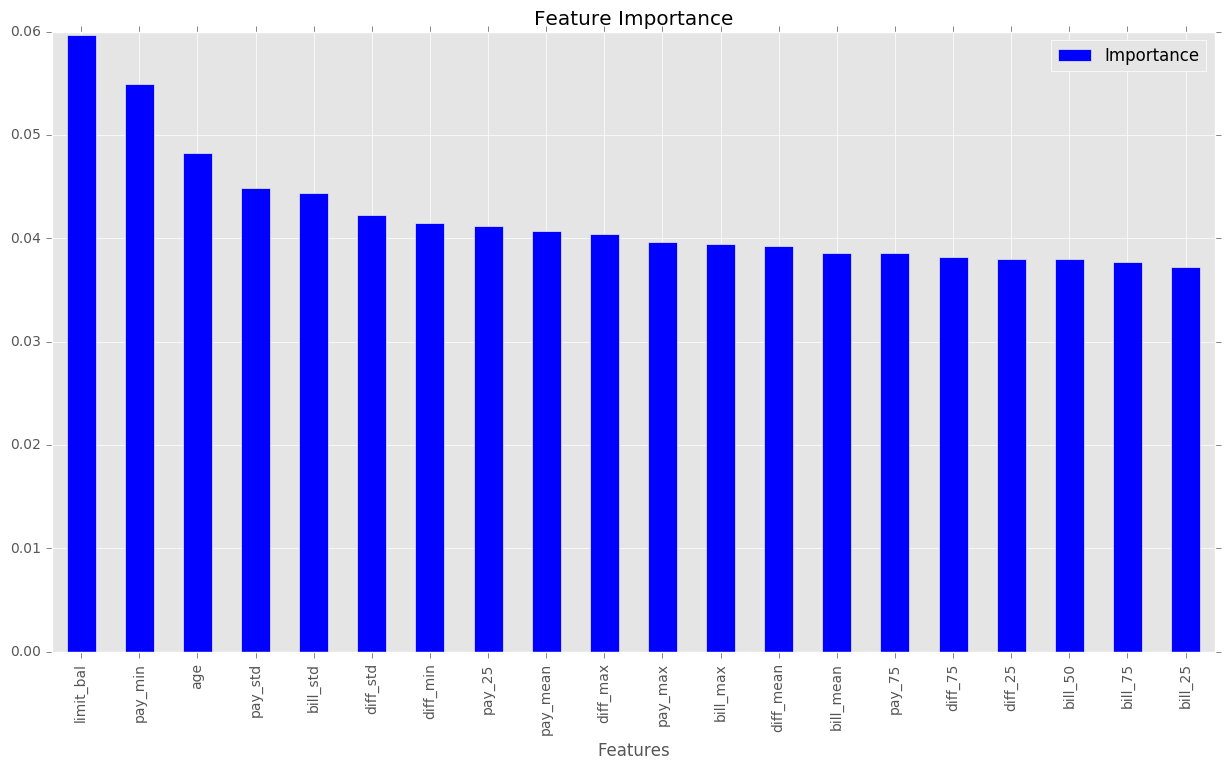

In [275]:
features = X_train.columns.values
pd.DataFrame({'Features':features,'Importance':clf_tuned.feature_importances_}).sort_values(
by = 'Importance',ascending = False).head(20).set_index("Features").plot(kind = "bar")
plt.title("Feature Importance")

### 5.4 Baseline Adaboost Classifier

In [247]:
from sklearn.ensemble import AdaBoostClassifier

In [248]:
gbm = AdaBoostClassifier()

In [249]:
gbm.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [250]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(gbm, X_train, y_train, scoring = 'neg_log_loss', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

-0.682776411911 8.35997555682e-05


In [252]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(gbm, X_train, y_train, scoring = 'roc_auc', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

0.713244647057 0.00671456421404


### 5.5 Tuned Adaboost Classifier

In [256]:
glf = GridSearchCV(AdaBoostClassifier(),
                   param_grid = {'n_estimators': [50,100,200],
                                 'learning_rate' : [0.01,0.1,1]},
                   scoring = 'neg_log_loss',
                   n_jobs = -1,
                   verbose = 1)
glf.fit(X_train,y_train)    

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   59.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='neg_log_loss',
       verbose=1)

In [257]:
print glf.best_params_, glf.best_score_

{'n_estimators': 50, 'learning_rate': 0.01} -0.512038819869


In [258]:
glf.grid_scores_

[mean: -0.51204, std: 0.00102, params: {'n_estimators': 50, 'learning_rate': 0.01},
 mean: -0.52458, std: 0.00041, params: {'n_estimators': 100, 'learning_rate': 0.01},
 mean: -0.55576, std: 0.00052, params: {'n_estimators': 200, 'learning_rate': 0.01},
 mean: -0.61430, std: 0.00031, params: {'n_estimators': 50, 'learning_rate': 0.1},
 mean: -0.64896, std: 0.00011, params: {'n_estimators': 100, 'learning_rate': 0.1},
 mean: -0.66935, std: 0.00003, params: {'n_estimators': 200, 'learning_rate': 0.1},
 mean: -0.68274, std: 0.00003, params: {'n_estimators': 50, 'learning_rate': 1},
 mean: -0.68780, std: 0.00007, params: {'n_estimators': 100, 'learning_rate': 1},
 mean: -0.69034, std: 0.00002, params: {'n_estimators': 200, 'learning_rate': 1}]

In [259]:
gbm_tuned = glf.best_estimator_

Cross-validated log loss

In [260]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(gbm_tuned, X_train, y_train, scoring = 'neg_log_loss', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

-0.511886536375 0.000654074152043


Cross-validated AUC

In [261]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(gbm_tuned, X_train, y_train, scoring = 'roc_auc', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

0.674767922386 0.0047338626351


## 6. Predictions

Using the tuned random forest model to make predictions.

In [282]:
y = clf_tuned.predict_proba(X_test)[:,1]

In [287]:
y

array([ 0.035,  0.155,  0.402, ...,  0.368,  0.375,  0.411])

In [285]:
submission = pd.DataFrame({'customer_id':test['customer_id'],'pr_y':y})

In [288]:
submission.to_csv("Joel_predictions.csv", index = False)